## Q1 a) Implementing Gaussian Naive Bayes from scratch

In [48]:
#reference: https://scikit-learn.org/stable/modules/naive_bayes.html
#reference: https://matplotlib.org/2.1.2/gallery/animation/dynamic_image2.html 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.animation as animation

def accuracy(test_Y, y_predict):
    return (len(test_Y)-np.count_nonzero(test_Y-y_predict))/len(test_Y)

In [2]:
data=datasets.load_iris()
data_=np.insert(data.data, 4, data.target, 1)
data_.dump
np.random.seed(0)
data_=shuffle(data_)              #random shuffling

In [3]:
c=np.append(data.feature_names, "target")
df=pd.DataFrame(data_, columns=c)
df[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.8,2.8,5.1,2.4,2.0
1,6.0,2.2,4.0,1.0,1.0
2,5.5,4.2,1.4,0.2,0.0
3,7.3,2.9,6.3,1.8,2.0
4,5.0,3.4,1.5,0.2,0.0
5,6.3,3.3,6.0,2.5,2.0
6,5.0,3.5,1.3,0.3,0.0
7,6.7,3.1,4.7,1.5,1.0
8,6.8,2.8,4.8,1.4,1.0
9,6.1,2.8,4.0,1.3,1.0


In [4]:
df=df.drop(columns=["sepal width (cm)" , "petal length (cm)"] )


In [5]:
data_=np.array(df)
df[:10]

,sepal length (cm),petal width (cm),target
0,5.8,2.4,2.0
1,6.0,1.0,1.0
2,5.5,0.2,0.0
3,7.3,1.8,2.0
4,5.0,0.2,0.0
5,6.3,2.5,2.0
6,5.0,0.3,0.0
7,6.7,1.5,1.0
8,6.8,1.4,1.0
9,6.1,1.3,1.0


In [6]:
#test_train_split
split=int(0.7*len(data_))

train_X=data_[:split, :-1]
train_Y=data_[:split,-1]
test_X=data_[split:, :-1]
test_Y=data_[split:, -1]

for i in [train_X, train_Y, test_X, test_Y]:
    print (i.shape, '')

(105, 2) 
(105,) 
(45, 2) 
(45,) 


In [7]:
class GaussianNaiveBayes:
    def fit(self, X,y):
        n=len(X[0])                 #no. of features
        y_frequency=np.bincount(np.int64(test_Y))
        self.P_y={}
        self.distinct_target=np.int64(np.array(list(set(y))))
        self.class_data={}
        for i in self.distinct_target:
            self.class_data[int(i)]=[[0,0]]*n                   # to store mean and variance for each class for each feature
            self.P_y[int(i)]=y_frequency[int(i)]/len(y)              # probability of each class, P(y)
        
        for i in range(n):
            for j in self.distinct_target:
                feature=X[:,i]
                tmp=[]
                for idx, val in enumerate(feature):
                    if y[idx]==j:
                        tmp.append(val)
                tmp=np.array(tmp)
                mean=np.mean(tmp)
                var=np.var(tmp)
                if var==0:
                    var=10**(-20)
                self.class_data[j][i]=[mean, var]
    
    def predict(self,X):
        y_=[]
        self.P=[]
        for i in X:
            tmp_val=-1*np.inf
            y=0
            for j in self.distinct_target:
                tmp=1
                for idx, val in enumerate(i):
                    var=self.class_data[j][idx][1]
                    mean=self.class_data[j][idx][0]
                    tmp=tmp*(1*np.exp( -1*((val-mean)**2)/(2*var) )/(2*3.143*var)**0.5)
                tmp=tmp*self.P_y[j]
                if tmp>tmp_val:     #finding the argmax
                    y=j
                    tmp_val=tmp
            y_.append(y)
            self.P.append(tmp)
        return np.array(y_)
                    

In [8]:
gnb=GaussianNaiveBayes()

In [9]:
gnb.fit(train_X, train_Y)

In [10]:
y_predict=gnb.predict(test_X)

In [11]:
accuracy(test_Y, y_predict)*100     #accuracy of the prediction

95.55555555555556

### Comparing the accuracy of my model with that of sklearn's inbuilt model

In [12]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(train_X, train_Y)
y=gn.predict(test_X)
accuracy(y,test_Y)*100

95.55555555555556

## 1 b) Active Learning 

In [13]:
iterations=10

In [19]:
h=0.5
x_min, x_max=min(data_[:,0])-0.5, max(data_[:,0])+0.5
y_min, y_max=min(data_[:,1])-0.5, max(data_[:, 1])+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ITERATION  1 of Active Learning


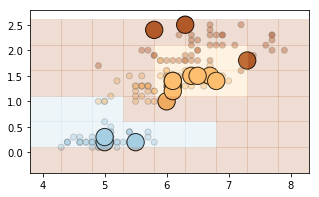

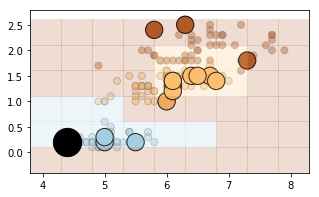

Training set shape (16, 2)
Accuracy :  0.9047619047619048


*****************************************************
ITERATION  2 of Active Learning


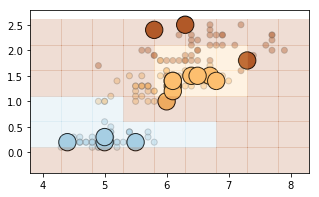

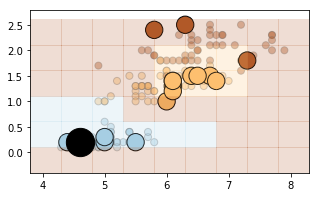

Training set shape (17, 2)
Accuracy :  0.8952380952380953


*****************************************************
ITERATION  3 of Active Learning


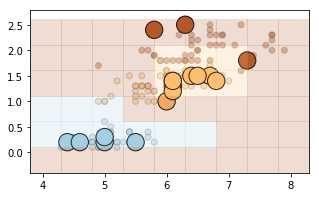

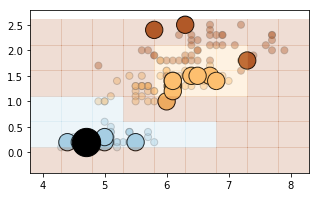

Training set shape (18, 2)
Accuracy :  0.8761904761904762


*****************************************************
ITERATION  4 of Active Learning


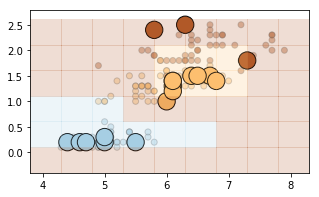

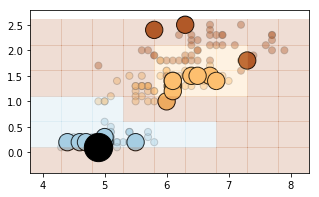

Training set shape (19, 2)
Accuracy :  0.9047619047619048


*****************************************************
ITERATION  5 of Active Learning


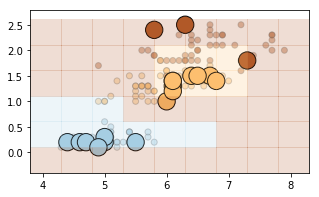

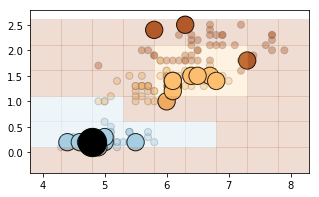

Training set shape (20, 2)
Accuracy :  0.8952380952380953


*****************************************************
ITERATION  6 of Active Learning


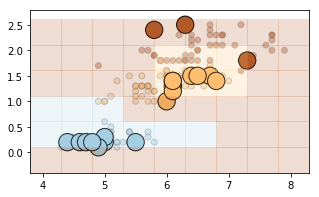

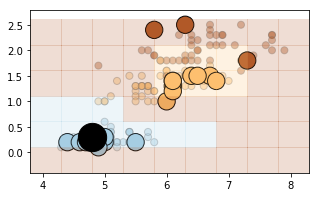

Training set shape (21, 2)
Accuracy :  0.9047619047619048


*****************************************************
ITERATION  7 of Active Learning


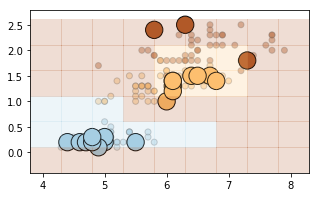

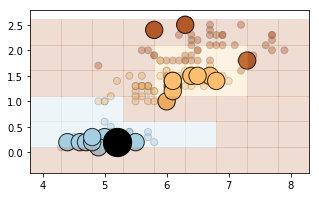

Training set shape (22, 2)
Accuracy :  0.9047619047619048


*****************************************************
ITERATION  8 of Active Learning


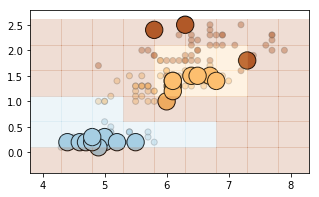

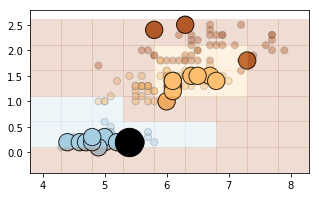

Training set shape (23, 2)
Accuracy :  0.9047619047619048


*****************************************************
ITERATION  9 of Active Learning


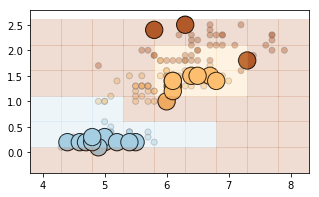

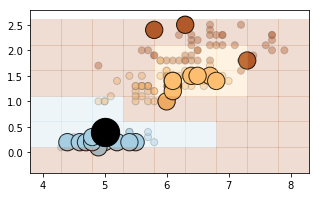

Training set shape (24, 2)
Accuracy :  0.9142857142857143


*****************************************************
ITERATION  10 of Active Learning


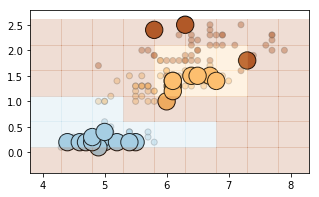

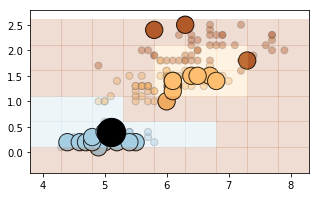

Training set shape (25, 2)
Accuracy :  0.9142857142857143


*****************************************************


In [62]:
np.random.seed()
split1=int(0.1*len(data_))
split2=int(0.3*len(data_))
train_X1=data_[:split1, :-1]
train_Y1=data_[:split1, -1]
test_X1=data_[split2: ,: -1]
test_Y1=data_[split2: , -1]
pool=data_[split1:split2]

gnb=GaussianNaiveBayes()
gnb.fit(train_X1, train_Y1)
y1=gnb.predict(test_X1)

plt_yA=[]
for i in range(iterations):
    print("ITERATION ",i+1,"of Active Learning")
    X=pool[:,:-1]
    Y=pool[:,-1]
    
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.scatter(data_[:,0], data_[:,1], c= data_[:,2], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey' )
    ax.scatter(train_X1[:,0], train_X1[:,1], c= train_Y1, edgecolors='k', s=300, cmap=plt.cm.Paired )
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.savefig('Images/'+str(i)+'.jpg')
    plt.show()
    
    y_=gnb.predict(X)
    
    selected_ftr_idx=gnb.P.index(min(gnb.P))     #the index in pool to be selected for annortation
    
    train_X1=np.insert(train_X1, len(train_X1), X[selected_ftr_idx],  0)
    train_Y1=np.insert(train_Y1, len(train_Y1), Y[selected_ftr_idx])
    pool=np.delete(pool, selected_ftr_idx, 0)
    
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.scatter(data_[:,0], data_[:,1], c= data_[:,2], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
    ax.scatter(train_X1[:,0], train_X1[:,1], c= train_Y1, edgecolors='k', s=300, cmap=plt.cm.Paired )
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    ax.scatter([X[selected_ftr_idx][0]], [X[selected_ftr_idx][1]], c= 'k', 
                edgecolors='k', s=800, cmap=plt.cm.Paired )
    plt.savefig('Images/'+str(i)+'a.jpg')
    plt.show()


    print("Training set shape", train_X1.shape)
    gnb.fit(train_X1, train_Y1)
    y_=gnb.predict(test_X1)
    plt_yA.append(accuracy(y_, test_Y1))
    print("Accuracy : ", accuracy(y_, test_Y1))
    print("\n\n*****************************************************")

The gif is here: https://drive.google.com/open?id=1D6GrTwGQj76QY44aTQawr2tJiBzFpcfH


## 1. b(iii) Random Sampling

In [61]:
split1=int(0.1*len(data_))
split2=int(0.3*len(data_))
train_X1=data_[:split1, :-1]
train_Y1=data_[:split1, -1]
test_X1=data_[split2: ,: -1]
test_Y1=data_[split2: , -1]
pool=data_[split1:split2]

gnb=GaussianNaiveBayes()
gnb.fit(train_X1, train_Y1)
y1=gnb.predict(test_X1)

plt_x=[]
plt_y=[]
for i in range(iterations):
    print("ITERATION ",i+1,"of Active Learning")
    X=pool[:,:-1]
    Y=pool[:,-1]
    acc=[]
    for j in range(5):
        np.random.seed(j+5)
        
        y_=gnb.predict(X)

        selected_ftr_idx=np.random.randint(0, len(pool))    #the index in pool to be selected for annortation

        train_X1=np.insert(train_X1, len(train_X1), X[selected_ftr_idx],  0)
        train_Y1=np.insert(train_Y1, len(train_Y1), Y[selected_ftr_idx])
        

        print("Training set shape", train_X1.shape)
        gnb.fit(train_X1, train_Y1)
        y_=gnb.predict(test_X1)
        acc.append(accuracy(y_, test_Y1))
    pool=np.delete(pool, selected_ftr_idx, 0)
    plt_x.append(i)
    plt_y.append(np.mean(np.array(acc)))
    print("Accuracy : ", np.mean(np.array(acc)))
    print("\n\n*****************************************************")
    

ITERATION  1 of Active Learning
Training set shape (16, 2)
Training set shape (17, 2)
Training set shape (18, 2)
Training set shape (19, 2)
Training set shape (20, 2)
Accuracy :  0.9142857142857144


*****************************************************
ITERATION  2 of Active Learning
Training set shape (21, 2)
Training set shape (22, 2)
Training set shape (23, 2)
Training set shape (24, 2)
Training set shape (25, 2)
Accuracy :  0.9295238095238096


*****************************************************
ITERATION  3 of Active Learning
Training set shape (26, 2)
Training set shape (27, 2)
Training set shape (28, 2)
Training set shape (29, 2)
Training set shape (30, 2)
Accuracy :  0.9333333333333333


*****************************************************
ITERATION  4 of Active Learning
Training set shape (31, 2)
Training set shape (32, 2)
Training set shape (33, 2)
Training set shape (34, 2)
Training set shape (35, 2)
Accuracy :  0.9333333333333333


**************************************

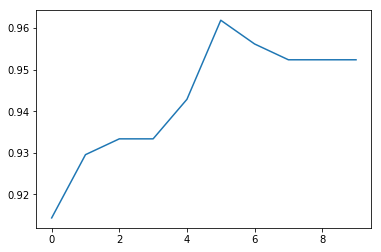

In [66]:
plt.plot(plt_x, plt_y) # plot for accuracy for random estimate

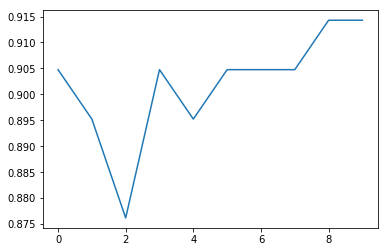

In [67]:
plt.plot(plt_x, plt_yA) # plot for accuracy for naive bayes with least confidence

<ErrorbarContainer object of 3 artists>

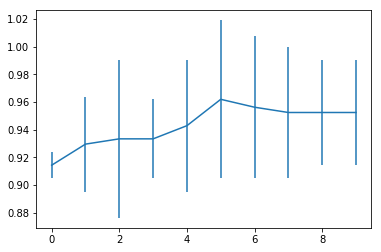

In [69]:
plt.errorbar(plt_x, plt_y, np.abs(np.array(plt_y)-np.array(plt_yA)))